In [2]:
import pandas as pd
import osmnx as ox
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import fiona; help(fiona.open)
pd.set_option('display.max_columns', None)

Help on function open in module fiona:

open(fp, mode='r', driver=None, schema=None, crs=None, encoding=None, layer=None, vfs=None, enabled_drivers=None, crs_wkt=None, **kwargs)
    Open a collection for read, append, or write
    
    In write mode, a driver name such as "ESRI Shapefile" or "GPX" (see
    OGR docs or ``ogr2ogr --help`` on the command line) and a schema
    mapping such as:
    
      {'geometry': 'Point',
       'properties': [('class', 'int'), ('label', 'str'),
                      ('value', 'float')]}
    
    must be provided. If a particular ordering of properties ("fields"
    in GIS parlance) in the written file is desired, a list of (key,
    value) pairs as above or an ordered dict is required. If no ordering
    is needed, a standard dict will suffice.
    
    A coordinate reference system for collections in write mode can be
    defined by the ``crs`` parameter. It takes Proj4 style mappings like
    
      {'proj': 'longlat', 'ellps': 'WGS84', 'datum': 'W

<AxesSubplot: >

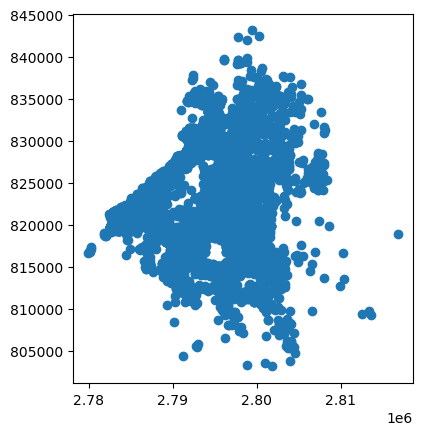

In [3]:
houses = pd.read_csv("data/houses_crime.csv").drop("Unnamed: 0", axis = 1)

houses_geo =   gpd.GeoDataFrame(houses, geometry=gpd.points_from_xy(houses.longitude, houses.latitude), crs=4326)
houses_geo = houses_geo.to_crs(epsg = 6362)
houses_geo.plot()

In [4]:
#amenities to use

"""
Parks and Greenspace, Schools​, Hospitals​, Sport facilities​, Supermarkets​
Malls​, Stadiums​, entretenimiento​, University​, Criminality​, Historic building/ (or only monuments)​
Museums​, Closeness to main straits​, Airport​, Distance to industry​, Distance subway​
"""

'\nParks and Greenspace, Schools\u200b, Hospitals\u200b, Sport facilities\u200b, Supermarkets\u200b\nMalls\u200b, Stadiums\u200b, entretenimiento\u200b, University\u200b, Criminality\u200b, Historic building/ (or only monuments)\u200b\nMuseums\u200b, Closeness to main straits\u200b, Airport\u200b, Distance to industry\u200b, Distance subway\u200b\n'

<AxesSubplot: >

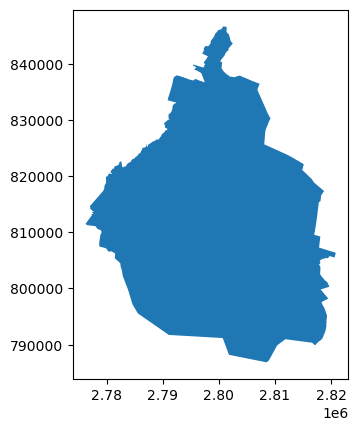

In [5]:
#importing osm
# Specify the name that is used to seach for the data
place_name = "Mexico City"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)
area = area.to_crs(epsg=6362)
area.plot()

## Get OSM data

In [6]:
def get_osm_data(tags:dict, geometrytype:str, crs:int=6362, verbose=False, plot=False):
    place = ox.geometries_from_place(place_name, tags).reset_index()
    place = place.loc[place["geometry"].geom_type.isin(geometrytype)].to_crs(crs)
    place["CATEGORY"] = (list(tags.values())[0][0])
    place = place[["name","geometry","CATEGORY"]]

    place["centroid"] = place["geometry"].apply(lambda x: x.centroid)
    
    place["area"] = place["geometry"].apply(lambda x: x.area)
    
    if verbose:
        display(place)
    if plot:
        place.plot()
    return place

In [7]:
def display_and_plot_data(dataframe):
    display(dataframe)
    dataframe.plot()

### Parks

,name,geometry,CATEGORY,centroid,area
393,Bosque de San Juan de Aragón,"POLYGON ((2805859.770 831328.112, 2805851.878 ...",park,POINT (2806377.672 832253.912),1.588094e+06
1978,Parque Ecológico de Xochimilco,"POLYGON ((2803770.703 812975.801, 2803796.161 ...",park,POINT (2804472.599 813661.131),1.519464e+06
1985,NaN,"POLYGON ((2806284.195 832844.788, 2806333.603 ...",park,POINT (2806370.436 832249.727),1.471409e+06
787,Área comunitaria de conservación,"POLYGON ((2802052.389 804409.195, 2802147.025 ...",park,POINT (2802523.996 804805.382),1.235208e+06
215,Bosque de Tláhuac,"POLYGON ((2809172.955 812609.441, 2809185.354 ...",park,POINT (2809776.746 812426.652),1.050063e+06
250,Parque Recreativo Santa Cruz Meyehualco,"POLYGON ((2809185.029 821449.082, 2809185.117 ...",park,POINT (2809592.076 820887.009),8.500883e+05
249,Alameda Oriente,"POLYGON ((2808578.043 829012.838, 2808591.524 ...",park,POINT (2808422.743 829564.751),8.013112e+05
302,Parque Bicentenario,"POLYGON ((2792400.426 833167.773, 2792398.100 ...",park,POINT (2793275.896 832947.891),7.777436e+05
217,Parque Ecológico de Cuemanco,"POLYGON ((2803914.936 814849.018, 2803887.059 ...",park,POINT (2804554.760 814822.060),6.580226e+05
252,Utopía Olini,"POLYGON ((2809654.038 822976.828, 2809507.664 ...",park,POINT (2809404.887 823497.013),5.804792e+05


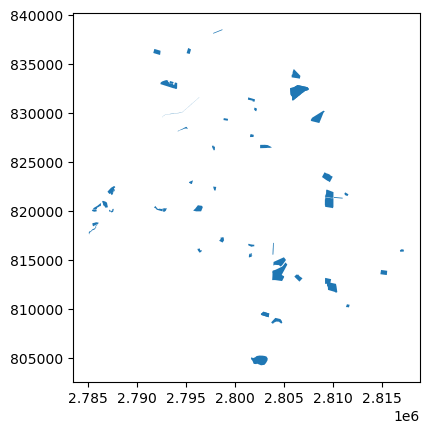

In [8]:
# List key-value pairs for tags
parks1 = get_osm_data({'leisure': ['park']}, ['Polygon'])
parks1 = parks1.sort_values(by= "area", ascending = False)
parks1 = parks1.head(50)

display_and_plot_data(parks1)

,name,geometry,CATEGORY,centroid,area
8,Parque Nacional El Tepozteco,"POLYGON ((2794991.666 778573.863, 2794886.361 ...",national_park,POINT (2803425.878 781010.894),2.355592e+08
9,Área de Protección de Flora y Fauna de Cobio C...,"POLYGON ((2780425.982 783684.528, 2780501.750 ...",national_park,POINT (2789417.819 785681.298),1.651474e+08
12,Subzona de Preservación - Parque Nacional El T...,"POLYGON ((2795509.049 780038.728, 2797682.664 ...",national_park,POINT (2804052.962 785710.423),1.017620e+08
11,Parque Nacional Desierto de los Leones,"POLYGON ((2783126.435 815377.415, 2783143.867 ...",national_park,POINT (2781659.367 813508.449),1.516743e+07
2,Parque Nacional Lomas de Padierna,"POLYGON ((2786897.736 815992.825, 2786947.652 ...",national_park,POINT (2789039.520 815584.749),1.155737e+07
7,La Marquesa,"POLYGON ((2775411.206 813728.347, 2775511.435 ...",national_park,POINT (2775081.032 812662.654),8.609028e+06
3,Parque Nacional Cumbres del Ajusco,"POLYGON ((2787164.388 804869.128, 2787085.360 ...",national_park,POINT (2787460.146 804171.221),4.909738e+06
0,Parque Nacional Cerro de la Estrella,"POLYGON ((2804075.429 819761.448, 2804110.429 ...",national_park,POINT (2804663.269 819423.766),1.456640e+06
10,Parque Nacional El Histórico Coyoacán,"POLYGON ((2795739.624 820109.329, 2795721.315 ...",national_park,POINT (2796260.552 820274.252),4.005933e+05
5,NaN,"POLYGON ((2796247.796 820607.675, 2796195.021 ...",national_park,POINT (2796262.331 820276.569),3.969143e+05


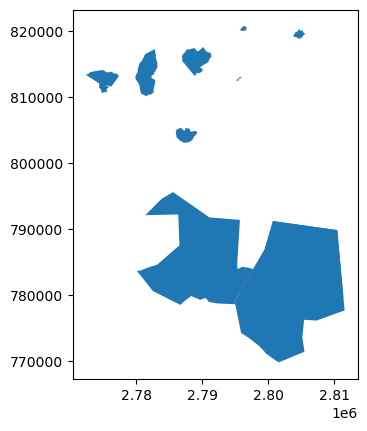

In [9]:
# List key-value pairs for tags
parks2 = get_osm_data({'boundary': ['national_park']}, ['Polygon'])
parks2 = parks2.sort_values(by= "area", ascending = False)
parks2 = parks2.head(50)

display_and_plot_data(parks2)

,name,geometry,CATEGORY,centroid,area
134,NaN,"POLYGON ((2801051.674 843080.192, 2801096.645 ...",forest,POINT (2801596.494 843268.298),705288.924830
2,Bosque,"POLYGON ((2779622.010 812594.637, 2779630.757 ...",forest,POINT (2780114.086 811768.705),700699.018166
163,NaN,"POLYGON ((2804388.943 804215.358, 2804420.013 ...",forest,POINT (2804927.154 804196.511),635694.065638
3,NaN,"POLYGON ((2781855.396 810341.823, 2781976.432 ...",forest,POINT (2782229.729 810907.137),439881.416681
162,NaN,"POLYGON ((2802112.278 804408.168, 2802134.451 ...",forest,POINT (2802489.963 804039.577),323400.559936
10,Cerro Mezatepetl,"POLYGON ((2788358.202 816229.694, 2788400.234 ...",forest,POINT (2787939.927 816550.926),297478.083688
6,NaN,"POLYGON ((2791206.520 827638.266, 2791209.529 ...",forest,POINT (2790993.278 827374.412),286078.309892
0,Bosque,"POLYGON ((2779360.657 811647.864, 2779363.599 ...",forest,POINT (2779614.747 811563.481),215038.797867
110,NaN,"POLYGON ((2816006.770 818331.219, 2815892.989 ...",forest,POINT (2816155.956 818651.286),149397.009479
126,Barranca de Tecamachalco,"POLYGON ((2789744.959 827022.133, 2789749.873 ...",forest,POINT (2790209.504 827796.287),131963.066855


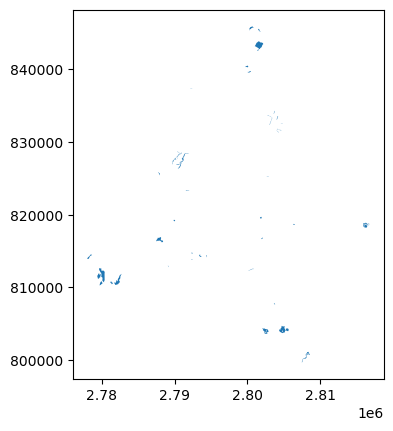

In [10]:
# List key-value pairs for tags
parks3 = get_osm_data({'landuse': ['forest']}, ['Polygon'])
parks3 = parks3.sort_values(by= "area", ascending = False)
parks3 = parks3.head(50)

display_and_plot_data(parks3)

In [11]:
parks = pd.concat([parks1,parks2,parks3], axis = 0)

### Schools and College

,name,geometry,CATEGORY,centroid,area
0,CECC,POINT (2793296.501 815459.609),school,POINT (2793296.501 815459.609),0.000000
1,NaN,POINT (2794784.089 822480.110),school,POINT (2794784.089 822480.110),0.000000
2,Simón Bolivar,POINT (2794928.664 822137.763),school,POINT (2794928.664 822137.763),0.000000
3,IPN,POINT (2790390.440 829055.458),school,POINT (2790390.440 829055.458),0.000000
4,"Escuela Secundaria Diurna N° 10 ""Leopoldo Ayala""",POINT (2794826.129 822558.935),school,POINT (2794826.129 822558.935),0.000000
...,...,...,...,...,...
1215,Escuela Nacional Preparatoria No. 7,"MULTIPOLYGON (((2800859.693 827534.918, 280085...",school,POINT (2800909.336 827648.573),27738.333066
1216,Escuela Nacional Preparatoria No. 8,"POLYGON ((2793807.664 821720.596, 2793807.049 ...",school,POINT (2793921.624 821692.508),30810.587486
1217,Centro de Estudios Científicos y Tecnológicos ...,"POLYGON ((2805549.914 831517.874, 2805627.819 ...",school,POINT (2805661.114 831575.875),51392.959881
1218,Centro de Estudios Científicos y Tecnológicos ...,"POLYGON ((2798357.120 828907.094, 2798399.138 ...",school,POINT (2798366.131 828853.836),4870.745121


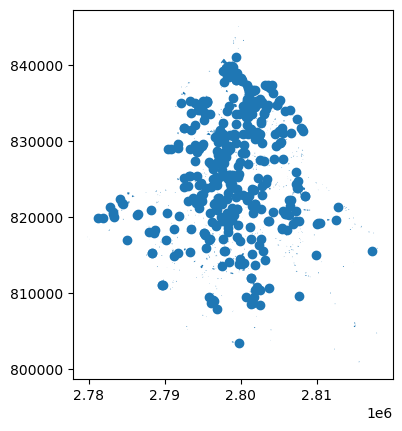

In [12]:
# List key-value pairs for tags
schools = get_osm_data({'amenity': ['school',"college"]}, ['Point', 'Polygon', 'MultiPolygon'])

display_and_plot_data(schools)

### Universities

,name,geometry,CATEGORY,centroid,area
4,Universidad Panamericana Santa Fe,POINT (2787022.797 821563.150),university,POINT (2787022.797 821563.150),0.000000
19,Facultad de Derecho,POINT (2794892.996 818111.963),university,POINT (2794892.996 818111.963),0.000000
71,Universidad Panamericana,"POLYGON ((2794946.613 822338.364, 2794954.419 ...",university,POINT (2795027.853 822382.753),13274.136275
74,Universidad Iberoamericana,"POLYGON ((2786364.110 821597.787, 2786372.191 ...",university,POINT (2786607.083 821854.051),192829.096009
77,UAM Rectoría,"POLYGON ((2799971.377 812946.323, 2800053.529 ...",university,POINT (2800102.902 812986.838),25873.244252
80,"Tecnológico de Monterrey, Campus Santa Fe","POLYGON ((2787040.389 820458.695, 2787031.881 ...",university,POINT (2787190.396 820713.154),135535.027223
83,Casco de Santo Tomás IPN,"POLYGON ((2796427.103 831172.157, 2796625.767 ...",university,POINT (2796517.056 831072.712),35460.686632
90,Casa del Tiempo UAM,"POLYGON ((2794990.799 826679.984, 2794983.287 ...",university,POINT (2795010.457 826661.050),1160.459669
119,Universidad del Valle de Mexico Campus Coyoacán,"POLYGON ((2799652.939 815630.388, 2799965.230 ...",university,POINT (2799842.893 815693.104),75366.789444
121,ITAM Santa Teresa,"POLYGON ((2791014.617 815456.784, 2791011.040 ...",university,POINT (2790976.268 815576.698),17707.713659


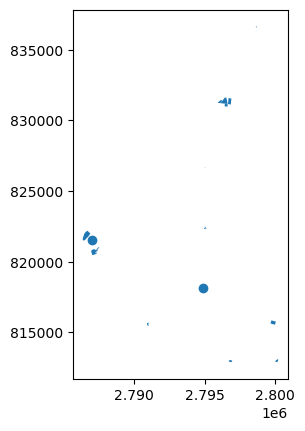

In [13]:
# List key-value pairs for tags
university = get_osm_data({'amenity': ['university']} , ['Point', 'Polygon', 'MultiPolygon'])

university_names = 'derecho|ipn|itam|monterrey|uam|mexico|ibero|panamericana'
university = university.loc[university["name"].str.contains(university_names, case = False) ==True ]

display_and_plot_data(university)

### Hospitals

,name,geometry,CATEGORY,centroid,area
0,Hospital San Angel Inn,POINT (2793385.481 818739.362),hospital,POINT (2793385.481 818739.362),0.000000
1,Santa Teresita,POINT (2792527.093 827770.257),hospital,POINT (2792527.093 827770.257),0.000000
2,Hospital San Ángel Inn Chapultepec,POINT (2796022.251 827773.311),hospital,POINT (2796022.251 827773.311),0.000000
3,Clínica Hospital 8 IMSS,POINT (2793275.420 818324.236),hospital,POINT (2793275.420 818324.236),0.000000
4,Instituto Nacional de Pediatria,POINT (2794993.836 814992.371),hospital,POINT (2794993.836 814992.371),0.000000
...,...,...,...,...,...
244,Hospital Nacional Homeopático,"POLYGON ((2799928.780 827845.291, 2799929.083 ...",hospital,POINT (2799968.024 827883.113),5944.911433
245,Centro Médico Universitario,"POLYGON ((2794783.617 817629.211, 2794785.393 ...",hospital,POINT (2794709.552 817597.566),5021.189847
246,Complejo de hospitales IMSS,"POLYGON ((2793320.509 818391.206, 2793407.051 ...",hospital,POINT (2793339.975 818353.167),21230.443576
247,Hospital General de zona No. 47 IMSS,"POLYGON ((2808564.140 821035.673, 2808574.441 ...",hospital,POINT (2808595.693 820955.730),11878.982728


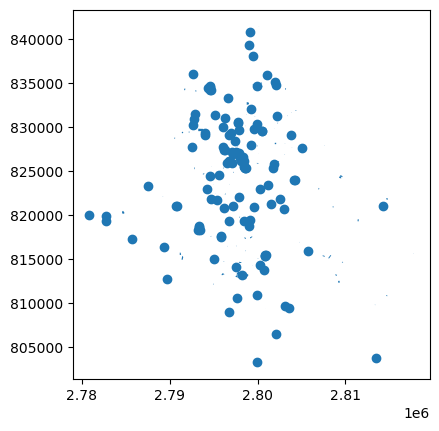

In [14]:
# List key-value pairs for tags
hospital = get_osm_data({'amenity': ['hospital']}, ['Point', 'Polygon', 'MultiPolygon'])

display_and_plot_data(hospital)

### Sport facilities

,name,geometry,CATEGORY,centroid,area
0,Deportivo Jose Maria Morelos Y Pavon,POINT (2793798.433 830840.879),sport,POINT (2793798.433 830840.879),0.000000
1,Sports World Universidad,POINT (2796752.355 821621.386),sport,POINT (2796752.355 821621.386),0.000000
2,YMCA Mallorca,POINT (2800410.698 822757.985),sport,POINT (2800410.698 822757.985),0.000000
3,Deportivo Morelos,POINT (2784240.665 821122.739),sport,POINT (2784240.665 821122.739),0.000000
4,Sport city,POINT (2793977.722 818691.760),sport,POINT (2793977.722 818691.760),0.000000
5,Deportivo Parque Lira,"POLYGON ((2794175.289 826012.041, 2794183.216 ...",sport,POINT (2794194.044 825982.497),1863.685068
7,Balancán,"POLYGON ((2790604.354 814110.921, 2790562.348 ...",sport,POINT (2790601.624 814149.043),2446.677056
8,Balancán,"POLYGON ((2791440.268 813875.899, 2791423.855 ...",sport,POINT (2791393.786 813840.842),6750.953762


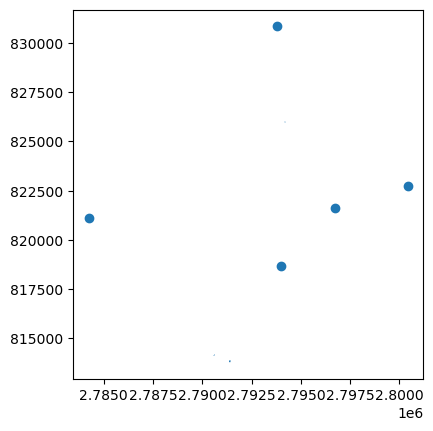

In [15]:
# List key-value pairs for tags
sport_facility = get_osm_data({'club': ['sport']}, ['Point', 'Polygon', 'MultiPolygon'])

display_and_plot_data(sport_facility)

### Supermarkets

,name,geometry,CATEGORY,centroid,area
0,Walmart Express,POINT (2793476.250 818152.842),supermarket,POINT (2793476.250 818152.842),0.000000
1,NaN,POINT (2804528.081 828228.906),supermarket,POINT (2804528.081 828228.906),0.000000
2,Soriana,POINT (2798038.971 825692.961),supermarket,POINT (2798038.971 825692.961),0.000000
3,Bodega Comercial Mexicana,POINT (2800725.748 813263.811),supermarket,POINT (2800725.748 813263.811),0.000000
4,Chedraui,POINT (2804242.409 835012.871),supermarket,POINT (2804242.409 835012.871),0.000000
...,...,...,...,...,...
445,Scorpion Ermita,"POLYGON ((2811835.771 819537.457, 2811880.737 ...",supermarket,POINT (2811859.183 819558.989),2021.992192
446,Soriana Express,"POLYGON ((2808499.158 816937.683, 2808506.165 ...",supermarket,POINT (2808513.534 816913.213),2130.094549
447,Chedraui,"POLYGON ((2793524.080 818144.944, 2793553.293 ...",supermarket,POINT (2793573.499 818114.646),3983.742343
448,NaN,"POLYGON ((2799313.525 841269.756, 2799292.770 ...",supermarket,POINT (2799329.899 841233.326),3110.060553


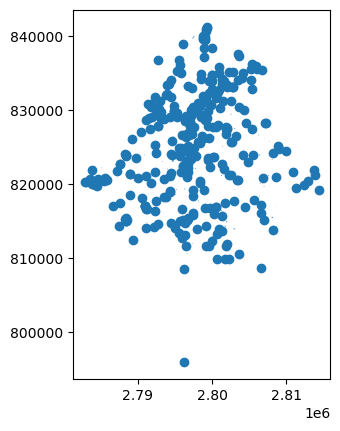

In [16]:
# List key-value pairs for tags
supermarket = get_osm_data({'shop': ['supermarket']}, ['Point', 'Polygon', 'MultiPolygon'])

display_and_plot_data(supermarket)

### Malls



,name,geometry,CATEGORY,centroid,area
159,Plaza Oriente,"POLYGON ((2805573.492 823578.127, 2805587.182 ...",mall,POINT (2805880.022 823758.214),169820.232888
33,Centro Santa Fe,"POLYGON ((2785469.524 820844.619, 2785465.718 ...",mall,POINT (2785581.023 820901.025),86362.241760
24,Gran Sur,"POLYGON ((2797110.182 815221.772, 2797091.317 ...",mall,POINT (2797009.838 815004.498),70349.170243
142,NaN,"POLYGON ((2792344.293 829769.120, 2792346.882 ...",mall,POINT (2792475.501 829894.631),68629.219783
56,Parque Tezontle,"POLYGON ((2805470.675 823597.983, 2805467.080 ...",mall,POINT (2805563.901 823795.066),63205.961868
...,...,...,...,...,...
64,Zentrika,"POLYGON ((2785427.176 820751.650, 2785442.840 ...",mall,POINT (2785458.997 820695.162),7752.274907
127,Park Plaza,"POLYGON ((2787172.560 821340.019, 2787185.177 ...",mall,POINT (2787106.007 821283.939),7698.461396
103,Plaza Parque Jardín,"POLYGON ((2797328.743 833020.444, 2797286.806 ...",mall,POINT (2797284.856 832979.181),7478.517435
28,Plaza Opción Loreto,"POLYGON ((2793966.284 818570.387, 2793969.992 ...",mall,POINT (2793992.583 818640.758),6840.767018


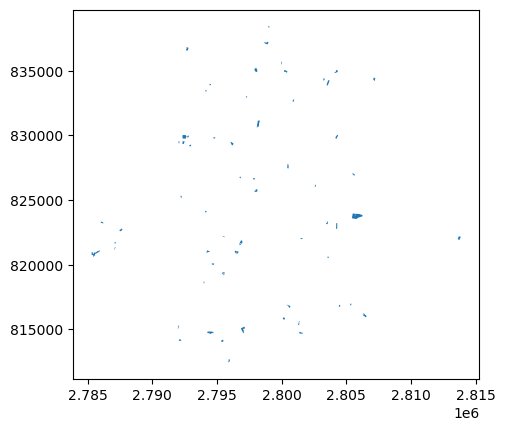

In [17]:
# List key-value pairs for tags
mall = get_osm_data({'shop': ['mall']}  , ['Polygon'])
mall = mall.sort_values(by= "area", ascending = False)
mall = mall.head(70)

display_and_plot_data(mall)

### Stadiums​

,name,geometry,CATEGORY,centroid,area
0,Estadio Azteca,"POLYGON ((2798528.554 814745.210, 2798526.860 ...",stadium,POINT (2798639.282 814711.501),52114.261363
1,Estadio Ciudad de los Deportes,"POLYGON ((2795465.278 823512.869, 2795460.276 ...",stadium,POINT (2795548.682 823540.580),30420.022087
2,Plaza México,"POLYGON ((2795314.050 823422.546, 2795295.836 ...",stadium,POINT (2795359.946 823485.616),18799.867188
3,Estadio Wilfrido Massieu,"POLYGON ((2799413.414 836791.964, 2799403.845 ...",stadium,POINT (2799461.928 836701.620),25240.865664
4,Arena México,"POLYGON ((2798184.861 828171.192, 2798233.506 ...",stadium,POINT (2798208.329 828134.827),6139.561697
5,"Estadio de prácticas Roberto ""Tapatío"" Méndez","POLYGON ((2794863.858 817145.342, 2794757.445 ...",stadium,POINT (2794789.545 817237.610),24744.863974
6,Arena Ciudad de México,"POLYGON ((2795560.784 836048.422, 2795595.644 ...",stadium,POINT (2795621.021 836147.018),26693.289550
7,NaN,"POLYGON ((2814399.659 812002.508, 2814407.734 ...",stadium,POINT (2814443.044 811982.308),16083.721450
8,NaN,"POLYGON ((2798745.718 809517.351, 2798733.001 ...",stadium,POINT (2798783.822 809433.501),22021.073188
9,Estadio Alfredo Harp Helú,"POLYGON ((2805166.147 826116.668, 2805375.472 ...",stadium,POINT (2805249.128 825962.876),70397.699009


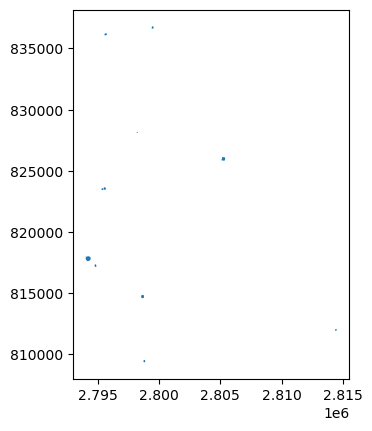

In [18]:
# List key-value pairs for tags
stadium = get_osm_data({'leisure': ['stadium']}   , ['Point', 'Polygon', 'MultiPolygon'])

display_and_plot_data(stadium)

# Historic buildings and monuments

,name,geometry,CATEGORY,centroid,area
0,Monumento Alvaro Obregón,POINT (2794826.435 819523.443),building,POINT (2794826.435 819523.443),0.000000
1,Bandera Monumental,POINT (2792261.166 817718.807),building,POINT (2792261.166 817718.807),0.000000
2,Ahuehuete,POINT (2796978.564 828581.242),building,POINT (2796978.564 828581.242),0.000000
3,C47 - El Mexicano,POINT (2806326.947 828158.863),building,POINT (2806326.947 828158.863),0.000000
4,Tótem Canadiense,POINT (2794316.829 827365.189),building,POINT (2794316.829 827365.189),0.000000
...,...,...,...,...,...
120,Monumento a la Madre,"POLYGON ((2797268.112 828982.156, 2797278.380 ...",building,POINT (2797270.417 828998.650),172.148573
121,Monumento a la Raza,"POLYGON ((2799111.230 832562.672, 2799112.612 ...",building,POINT (2799120.372 832549.912),808.522936
122,Monumento al Caminero,"POLYGON ((2796957.845 811842.900, 2796959.205 ...",building,POINT (2796970.882 811806.414),470.537480
123,Antigua Aduana de la Ciudad de México,"POLYGON ((2800176.445 829572.116, 2800171.089 ...",building,POINT (2800144.256 829566.414),3906.351372


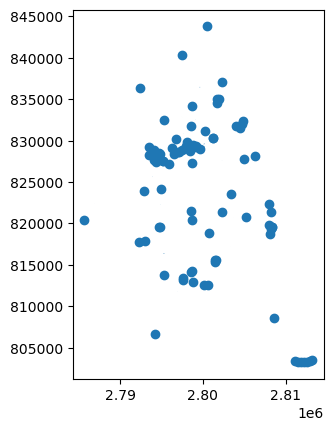

In [19]:
# List key-value pairs for tags
historic = get_osm_data({'historic':["building", "monument", "castle"]}, ['Point', 'Polygon', 'MultiPolygon'])

display_and_plot_data(historic)

### Museums

,name,geometry,CATEGORY,centroid,area
0,Casa de Carranza,POINT (2796998.196 828844.141),museum,POINT (2796998.196 828844.141),0.000000
1,Museo de las Intervenciones,POINT (2798694.994 820435.288),museum,POINT (2798694.994 820435.288),0.000000
2,Casa Frisac,POINT (2796847.627 813157.889),museum,POINT (2796847.627 813157.889),0.000000
3,Museo de Historia de Tlalpan,POINT (2796967.028 813013.166),museum,POINT (2796967.028 813013.166),0.000000
4,Museo Soumaya Plaza Loreto,POINT (2794156.203 818639.619),museum,POINT (2794156.203 818639.619),0.000000
...,...,...,...,...,...
140,Palacio de la Escuela de Medicina,"POLYGON ((2800130.630 829621.198, 2800124.285 ...",museum,POINT (2800168.442 829648.705),4396.657835
141,Museo Franz Mayer,"POLYGON ((2799054.917 829584.851, 2799143.720 ...",museum,POINT (2799095.836 829553.924),3793.529401
142,Palacio de Minería,"POLYGON ((2799451.458 829409.874, 2799536.465 ...",museum,POINT (2799487.621 829360.521),6492.434060
143,Museo Nacional de Arte,"POLYGON ((2799549.264 829492.800, 2799547.301 ...",museum,POINT (2799505.482 829468.903),3554.292416


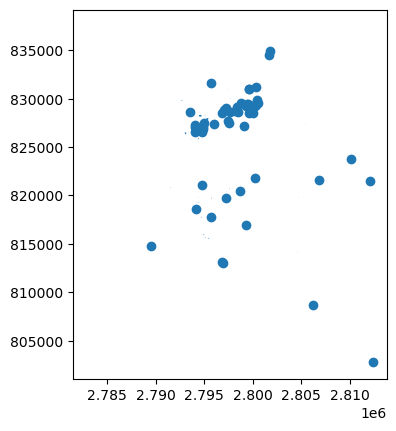

In [20]:
# List key-value pairs for tags
museum = get_osm_data({'tourism':["museum"]}, ['Point', 'Polygon', 'MultiPolygon'])

display_and_plot_data(museum)

### Airport

,name,geometry,CATEGORY,centroid,area
0,NaN,"POLYGON ((2806069.116 828112.372, 2806125.118 ...",apron,POINT (2806181.809 828180.096),56845.857675
1,Plataforma T1,"POLYGON ((2805035.523 829189.550, 2805009.467 ...",apron,POINT (2805389.675 829314.185),244492.306035
2,NaN,"POLYGON ((2807196.824 829118.890, 2807255.027 ...",apron,POINT (2807277.697 829108.504),12665.875916
3,NaN,"POLYGON ((2806979.902 829147.551, 2807085.224 ...",apron,POINT (2807077.163 829126.482),18150.116105
4,NaN,"POLYGON ((2805892.228 828615.383, 2805957.229 ...",apron,POINT (2806043.608 828636.900),34290.974213
5,Plataforma T2,"POLYGON ((2805989.282 828157.664, 2805990.040 ...",apron,POINT (2805747.244 828115.456),175283.173211
6,NaN,"POLYGON ((2807256.621 829399.606, 2807264.492 ...",apron,POINT (2807534.941 829462.479),117503.484906
7,NaN,"POLYGON ((2806207.199 829959.316, 2806420.338 ...",apron,POINT (2806857.608 830376.559),195758.607649
8,NaN,"POLYGON ((2806312.730 827927.984, 2806327.703 ...",apron,POINT (2806326.690 827892.221),2429.231387
9,NaN,"POLYGON ((2807242.749 829217.664, 2807292.386 ...",apron,POINT (2807382.196 829116.520),22817.833975


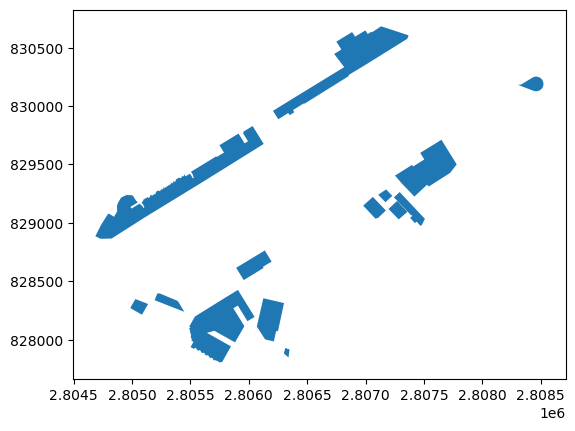

In [21]:
# List key-value pairs for tags
airport = get_osm_data({'aeroway':["apron"]}, ['Point', 'Polygon', 'MultiPolygon'])

display_and_plot_data(airport)

### Industry

,name,geometry,CATEGORY,centroid,area
0,Cerveceria Modelo,POINT (2794270.590 829907.608),industrial,POINT (2794270.590 829907.608),0.000000e+00
1,Planta de asfalto,"POLYGON ((2797231.358 815333.807, 2797328.035 ...",industrial,POINT (2797087.752 815553.300),1.291476e+05
2,Estudios Churubusco,"POLYGON ((2799216.195 820603.010, 2799192.233 ...",industrial,POINT (2799425.942 820531.060),4.753524e+04
3,L'oreal,"POLYGON ((2801956.592 811605.980, 2802007.235 ...",industrial,POINT (2802164.776 811467.279),6.914527e+04
4,Terminal de Carga Pical Pantaco,"POLYGON ((2795805.029 833696.751, 2796528.088 ...",industrial,POINT (2796261.084 834285.818),1.088130e+06
...,...,...,...,...,...
163,NaN,"POLYGON ((2800141.874 838064.097, 2800144.111 ...",industrial,POINT (2800159.591 838049.482),1.020345e+03
164,NaN,"POLYGON ((2799925.257 838046.089, 2799891.801 ...",industrial,POINT (2799931.204 838010.599),3.506984e+03
165,NaN,"POLYGON ((2800034.814 838054.936, 2800036.331 ...",industrial,POINT (2800051.344 838048.021),5.076936e+02
166,NaN,"POLYGON ((2800144.846 838032.752, 2800127.724 ...",industrial,POINT (2800134.978 838047.602),5.335164e+02


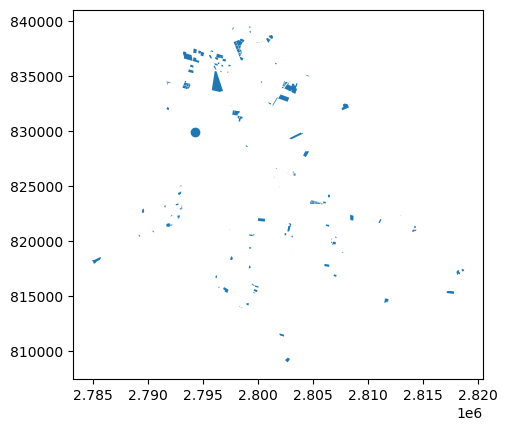

In [22]:
# List key-value pairs for tags
industry = get_osm_data({'landuse':["industrial"]}, ['Point', 'Polygon', 'MultiPolygon'])

display_and_plot_data(industry)

### Subway

,name,geometry,CATEGORY,centroid,area
0,NaN,POINT (2799346.951 834184.645),subway_entrance,POINT (2799346.951 834184.645),0.0
1,NaN,POINT (2799343.209 834194.859),subway_entrance,POINT (2799343.209 834194.859),0.0
2,NaN,POINT (2799698.000 819294.341),subway_entrance,POINT (2799698.000 819294.341),0.0
3,Sevilla,POINT (2796226.870 827761.559),subway_entrance,POINT (2796226.870 827761.559),0.0
4,NaN,POINT (2799248.504 834127.520),subway_entrance,POINT (2799248.504 834127.520),0.0
...,...,...,...,...,...
351,NaN,POINT (2798093.758 830567.734),subway_entrance,POINT (2798093.758 830567.734),0.0
352,Martín Carrera,POINT (2802985.528 834873.721),subway_entrance,POINT (2802985.528 834873.721),0.0
353,Camarones,POINT (2794073.622 834086.041),subway_entrance,POINT (2794073.622 834086.041),0.0
354,Camarones,POINT (2794147.245 834081.655),subway_entrance,POINT (2794147.245 834081.655),0.0


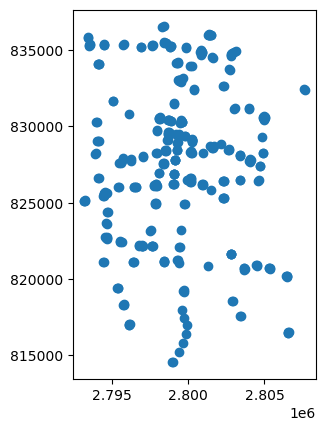

In [23]:
# List key-value pairs for tags
subway = get_osm_data({'railway':["subway_entrance"]}, ['Point'])

display_and_plot_data(subway)

### Metrobus (tram)

,name,geometry,CATEGORY,centroid,area
0,Rutas de transporte interno UNAM,POINT (2795946.621 816836.461),bus_station,POINT (2795946.621 816836.461),0.000000
1,Paradero Mixcoac,POINT (2794524.110 822612.605),bus_station,POINT (2794524.110 822612.605),0.000000
2,Terminal Ruta 117 San Bartolo Ameyalco,POINT (2785532.264 817749.799),bus_station,POINT (2785532.264 817749.799),0.000000
3,UACM San Lorenzo Tezonco,POINT (2808185.051 816167.918),bus_station,POINT (2808185.051 816167.918),0.000000
4,ADO-Pullman de Morelos México-Cuernavaca,POINT (2797659.253 809619.215),bus_station,POINT (2797659.253 809619.215),0.000000
...,...,...,...,...,...
173,NaN,"POLYGON ((2805233.374 829496.488, 2805231.019 ...",bus_station,POINT (2805251.517 829480.115),1295.711334
174,CETRAM Buenavista,"POLYGON ((2798251.586 830400.917, 2798248.577 ...",bus_station,POINT (2798218.636 830437.131),7151.238254
175,Torres de Padierna,"POLYGON ((2790521.792 812306.742, 2790477.105 ...",bus_station,POINT (2790498.925 812332.776),1410.295907
176,CETRAM Politécnico,"POLYGON ((2798060.228 836556.758, 2798280.530 ...",bus_station,POINT (2798164.824 836491.813),9930.524037


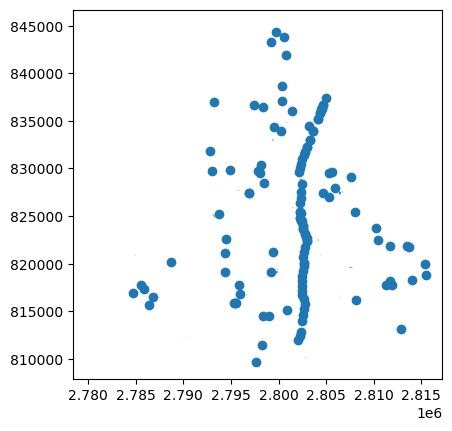

In [24]:
# List key-value pairs for tags
bus = get_osm_data({'amenity':["bus_station"]}, ['Point', 'Polygon', 'MultiPolygon'])
display_and_plot_data(bus)

# Calculating distances

In [25]:
import shapely
import numpy as np

In [26]:
#Distance function
def distances(houses,series_geometry):
    dis_list =np.zeros(len(houses))
    multipoints = (shapely.MultiPoint(list(series_geometry)))
    for index, house in enumerate(houses):               
        dis_list[index] = house.distance(multipoints)
    return pd.Series(dis_list)

    
features = ["parks", "schools", "university", "hospital", "sport_facility", "supermarket", "mall", "stadium", "historic", "museum", "airport", "industry", "subway", "bus"]

for i in features:
    houses_geo[i] = distances(houses_geo["geometry"], vars()[i]["centroid"])

In [27]:
houses_geo.to_csv("houses_distances.csv")
houses_geo.to_file("data/properties_distance_final.gpkg", driver = "GPKG")

In [28]:
houses_geo[houses_geo.columns[1:]].corr()['price'][:].sort_values()

C:\Users\evand\AppData\Local\Temp\ipykernel_24540\3046074522.py:1: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  houses_geo[houses_geo.columns[1:]].corr()['price'][:].sort_values()


longitude                -0.285892
high_impact/area         -0.272251
low_impact/area          -0.190758
security                 -0.181848
garden                   -0.175212
university               -0.160653
latitude                 -0.124066
parks                    -0.109743
pool                     -0.068510
sport_facility           -0.060056
age                      -0.036940
water strorage           -0.014668
mall                     -0.013622
supermarket              -0.009121
gated_community          -0.005689
balcony                  -0.001556
accasible_for_handicap   -0.001394
construction_size         0.003139
lot_size                  0.003175
furniture                 0.003502
service_room              0.004494
first_floor               0.011390
parking_space             0.015968
historic                  0.023854
air_conditioning          0.031985
museum                    0.035396
kitchen                   0.059591
roof_Garden               0.083272
hospital            